In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import shared_functions_wlp_wls as shared
import scipy.integrate

/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/halo_table_cache.py:12: UserWarning: Some of the functionality of the HaloTableCache classrequires h5py to be installed.
  warn("Some of the functionality of the HaloTableCache class"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/user_supplied_ptcl_catalog.py:13: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Most of the functionality of the sim_manager "
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/download_manager.py:39: UserWarning: Some of the functionality of the DownloadManager requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Some of the functionality of the DownloadManager requires h5py to be installed,\n"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/cached_halo_catalog.py:15: UserWarning: Most of the functionality of the

In [2]:
SURVEY = 'SDSS'
if (SURVEY=='SDSS'):
    import params as pa
elif (SURVEY=='LSST_DESI'):
    import params_LSST_DESI as pa
else:
    print "We don't have support for that survey yet; exiting."
    exit()

Goal: see how well we reproduce figure 8 of Zu & Mandelbaum 2015 which shows $<N_{\rm sat}>$ vs $M_h$.

In [3]:
# Define a halo mass range
lgMh = np.linspace(11.5, 15.5, 100)
Mh = 10**(lgMh)

Get $<N_{\rm sat}>$ with $M_*$ threshold of each stellar mass bin edge and subtract appropriately to get it in the stellar mass bins plotted in Figure 8.

In [4]:
Mslow = np.asarray([10.2, 10.6, 11.0, 11.2, 11.4, 12.])
Nsat_thresh = [0]*len(Mslow)
for mi in range(0,len(Mslow)):
    Nsat_thresh[mi] = shared.get_Nsat_Zu(Mh, 10**Mslow[mi], 'tot', 'SDSS')
    
Nsat_bin = [0] *(len(Mslow) - 1)
for bi in range(0, len(Mslow)-1):
    Nsat_bin[bi] = Nsat_thresh[bi] - Nsat_thresh[bi+1]

Plot thresholded

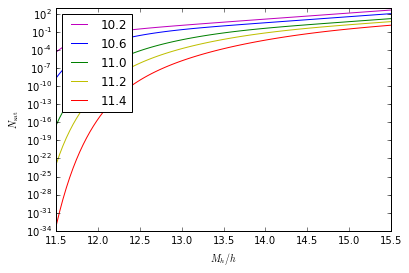

In [5]:
plt.figure()
plt.semilogy(lgMh, Nsat_thresh[0], 'm', label='10.2')
plt.hold(True)
plt.semilogy(lgMh, Nsat_thresh[1], 'b', label='10.6')
plt.hold(True)
plt.semilogy(lgMh, Nsat_thresh[2], 'g', label='11.0')
plt.hold(True)
plt.semilogy(lgMh, Nsat_thresh[3], 'y', label='11.2')
plt.hold(True)
plt.semilogy(lgMh, Nsat_thresh[4], 'r', label='11.4')
#plt.ylim(0.01, 100)
plt.ylabel('$N_{\\rm sat}$')
plt.xlabel('$M_h / h$')
plt.legend(loc=2)
#plt.show()
plt.savefig('./plots/Nsat_Figure8_zu2015_threshold.pdf')

Plot binned

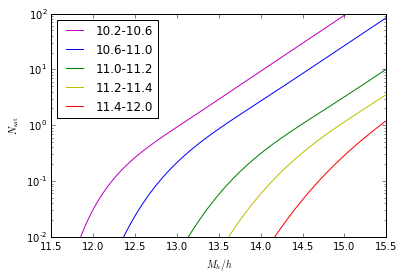

In [6]:
plt.figure()
plt.semilogy(lgMh, Nsat_bin[0], 'm', label='10.2-10.6')
plt.hold(True)
plt.semilogy(lgMh, Nsat_bin[1], 'b', label='10.6-11.0')
plt.hold(True)
plt.semilogy(lgMh, Nsat_bin[2], 'g', label='11.0-11.2')
plt.hold(True)
plt.semilogy(lgMh, Nsat_bin[3], 'y', label='11.2-11.4')
plt.hold(True)
plt.semilogy(lgMh, Nsat_bin[4], 'r', label='11.4-12.0')
plt.ylim(0.01, 100)
plt.ylabel('$N_{\\rm sat}$')
plt.xlabel('$M_h / h$')
plt.legend(loc=2)
#plt.show()
plt.savefig('./plots/Nsat_Figure8_zu2015.pdf')

Let's try to reproduce the right hand side of Figure 8, the Stellar - Halo mass relation

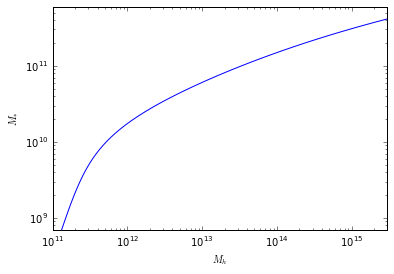

In [9]:
Msvec = np.logspace(np.log10(7*10**8), np.log10(6*10**11), 100)
Mh_out = shared.get_inv_fSHMR(Msvec, 'SDSS')

plt.figure()
plt.loglog(Mh_out, Msvec)
plt.ylabel('$M_{*}$')
plt.xlabel('$M_h$')
plt.xlim(10**11, 3*10**15)
plt.ylim(7*10**8, 6*10**11)
plt.savefig('./plots/Mh_vs_Mstar_fig9_Zu2015.pdf')

A little low on the low end. Not bad on the high end.